In [1]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from bokeh.io import show, output_notebook

#%matplotlib inline

In [2]:
target = 'TIC 300903537'
tpf = lk.search_targetpixelfile(target).download()

In [3]:
period_, phase_, bins_ = 5.4877722, 0., 20

In [4]:
tpf.interact()

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}


In [5]:
print(tpf.mission, tpf.targetid, tpf.sector, tpf.camera, tpf.ccd)

TESS 300903537 1 1 4


TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

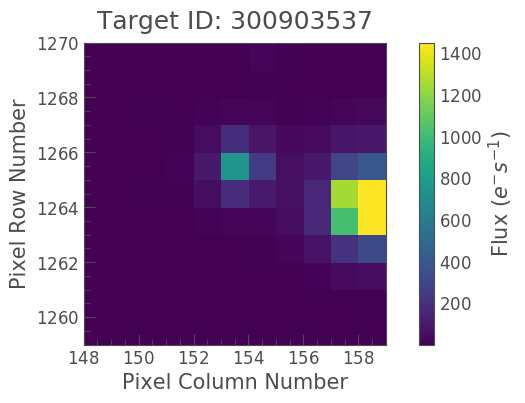

In [6]:
scale_ = 'linear'#'log'

median_image = np.nanmedian(tpf.flux, axis=0)
# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 95)

off_target_ = [3,7,8,11]
aperture_mask = np.zeros(tpf.shape[1:])
aperture_mask[off_target_[0]:off_target_[1],off_target_[2]:off_target_[3]] = 1

#tpf.plot(frame = 2117, aperture_mask=aperture_mask)#, mask_color='grey')
tpf.plot(aperture_mask=aperture_mask, mask_color='grey')
#plt.savefig('off_target_AP.png')

(1330.0, 1335)

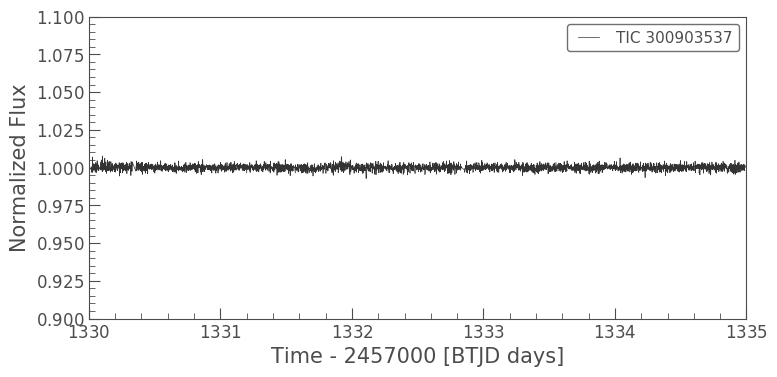

In [7]:
#lc = tpf.to_lightcurve(aperture_mask=aperture_mask).remove_nans().remove_outliers()
#tpf.to_lightcurve(aperture_mask=aperture_mask.astype(bool)).flatten().remove_nans().remove_outliers().plot()#.fold(period=period_, phase=phase_).bin(bins_).plot()

#lc = tpf.to_lightcurve(aperture_mask=aperture_mask.astype(bool)).remove_nans().remove_outliers(sigma = 5).flatten(window_length=1001).plot()#.bin(binsize=20).plot()#fold(period=period_).bin(binsize=10).plot()#.fold(period=period_, phase=phase_).bin(bins_).plot()
lc = tpf.to_lightcurve(aperture_mask=aperture_mask.astype(bool)).remove_nans().flatten(window_length=1001).plot()#.bin(binsize=20).plot()#fold(period=period_).bin(binsize=10).plot()#.fold(period=period_, phase=phase_).bin(bins_).plot()

plt.ylim(0.9, 1.1)
plt.xlim(1330., 1335)

#plt.savefig('off_target_LC.png')

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

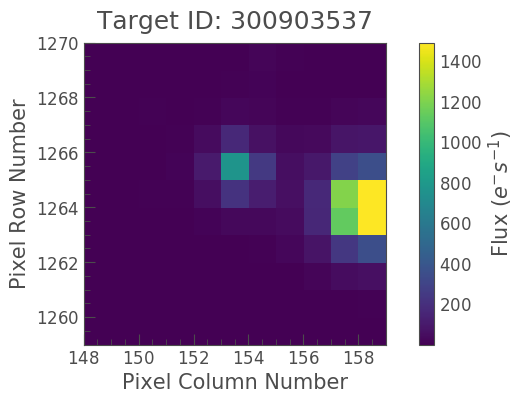

In [8]:
scale_ = 'linear'#'log'

median_image = np.nanmedian(tpf.flux, axis=0)
# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 95)

on_target_ = [5,8,4,7]
aperture_mask = np.zeros(tpf.shape[1:])
aperture_mask[on_target_[0]:on_target_[1],on_target_[2]:on_target_[3]] = 1

tpf.plot(frame = 2117, aperture_mask=aperture_mask)#, mask_color='grey')
#plt.savefig('on_target_AP.png')

(1330.0, 1335)

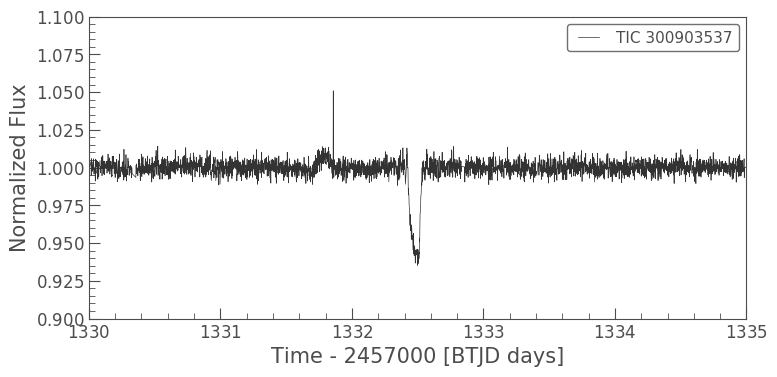

In [9]:
#lc = tpf.to_lightcurve(aperture_mask=aperture_mask.astype(bool)).remove_nans().remove_outliers(sigma = 5).flatten(window_length=1001).plot()#.bin(binsize=20).plot()#fold(period=period_).bin(binsize=10).plot()#.fold(period=period_, phase=phase_).bin(bins_).plot()
lc = tpf.to_lightcurve(aperture_mask=aperture_mask.astype(bool)).remove_nans().flatten(window_length=1001).plot()#.bin(binsize=20).plot()#fold(period=period_).bin(binsize=10).plot()#.fold(period=period_, phase=phase_).bin(bins_).plot()

plt.ylim(0.9, 1.1)
plt.xlim(1330., 1335)

#plt.savefig('on_target_LC.png')